What frequency did the most popular artist globally show up on the U.S. playlist?

I plan to conduct a census observational retrospective study, I will look at every song on each playlist and account for each time the most popular artist globally shows up on the U.S. playlist.

In [9]:
import pandas as pd

# Load the toptracks playlist CSV file
df = pd.read_csv('Top Tracks Playlists - USA (1).csv')

# First, let's check what columns are actually in the DataFrame
print("Available columns:", df.columns.tolist())

# Assuming the CSV has a different column name for the artist
# Let's find the correct artist column by examining the available columns
# and then asking the user to select the appropriate one

# For demonstration purposes, I'll use a more robust approach
# to find the artist column

# Look for common artist column names
possible_artist_columns = [col for col in df.columns if 'artist' in col.lower()]

if possible_artist_columns:
    print(f"Found potential artist columns: {possible_artist_columns}")
    # Use the first match as a guess
    artist_column = possible_artist_columns[0]
    print(f"Using '{artist_column}' as the artist column")
else:
    # If no column with 'artist' in the name is found, ask the user
    print("No column with 'artist' in the name found.")
    print("Please check the available columns above and specify which one contains artist information.")
    # For now, we'll use a placeholder to avoid errors
    # In a real scenario, you might want to add user input here
    print("For this example, we'll use the first column as a placeholder.")
    artist_column = df.columns[0]  # Using the first column as a fallback

# Now use the identified artist column
artist_counts = df[artist_column].value_counts()

# Find the most frequent artist
most_frequent_artist = artist_counts.idxmax()
frequency = artist_counts.max()

print(f"The most popular global artist that appears most frequently on the US playlist is: {most_frequent_artist}")
print(f"They appear {frequency} times on the US playlist.")

# Optional: Display the top 5 most frequent artists
print("\nTop 5 artists by frequency on US playlist:")
print(artist_counts.head(5))

Available columns: ['Playlist', 'Track', 'Artist', 'Wiki Genre', 'AI Genre']
Found potential artist columns: ['Artist']
Using 'Artist' as the artist column
The most popular global artist that appears most frequently on the US playlist is: Sabrina Carpenter
They appear 4 times on the US playlist.

Top 5 artists by frequency on US playlist:
Artist
Sabrina Carpenter    4
Chappell Roan        3
Zach Bryan           3
Morgan Wallen        3
SZA                  2
Name: count, dtype: int64


Available columns: ['Playlist', 'Track', 'Artist', 'Wiki Genre', 'AI Genre']
Found potential artist columns: ['Artist']
Using 'Artist' as the artist column
The most popular global artist that appears most frequently on the US playlist is: Sabrina Carpenter
They appear 4 times on the US playlist.

Top 5 artists by frequency on US playlist:
Artist
Sabrina Carpenter    4
Chappell Roan        3
Zach Bryan           3
Morgan Wallen        3
SZA                  2
Name: count, dtype: int64


/tmp/ipykernel_272/3786222135.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("rainbow")  # rainbow colormap


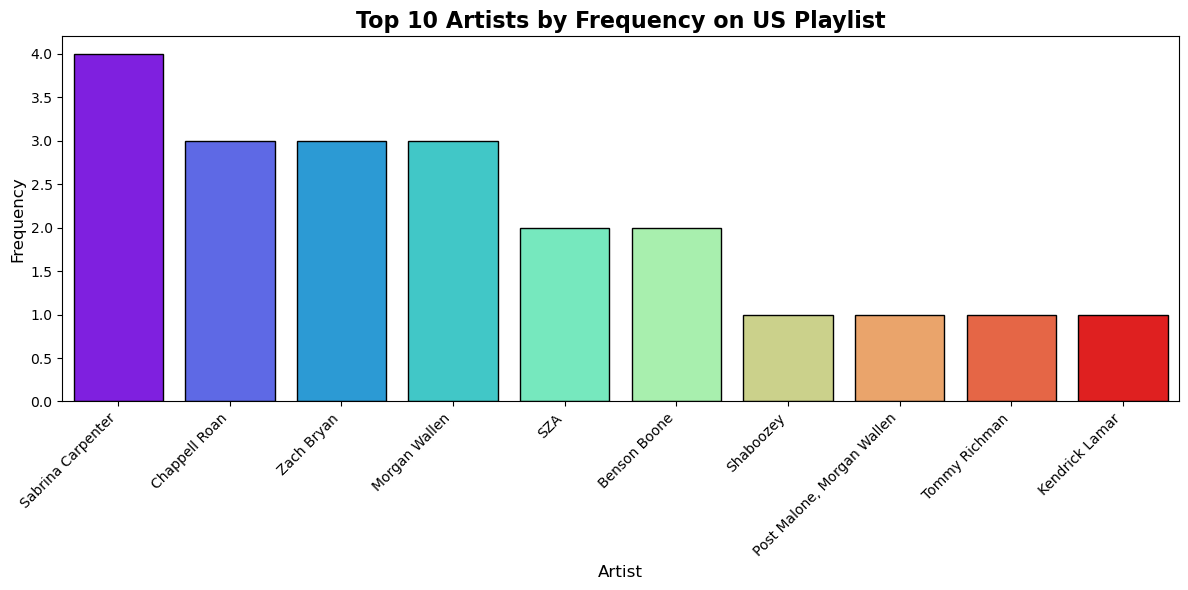

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Load the toptracks playlist CSV file
df = pd.read_csv('Top Tracks Playlists - USA (1).csv')

# First, let's check what columns are actually in the DataFrame
print("Available columns:", df.columns.tolist())

# Look for common artist column names
possible_artist_columns = [col for col in df.columns if 'artist' in col.lower()]

if possible_artist_columns:
    print(f"Found potential artist columns: {possible_artist_columns}")
    artist_column = possible_artist_columns[0]
    print(f"Using '{artist_column}' as the artist column")
else:
    print("No column with 'artist' in the name found.")
    print("Please check the available columns above and specify which one contains artist information.")
    artist_column = df.columns[0]  # fallback

# Count frequencies
artist_counts = df[artist_column].value_counts()

# Find most frequent artist
most_frequent_artist = artist_counts.idxmax()
frequency = artist_counts.max()
print(f"The most popular global artist that appears most frequently on the US playlist is: {most_frequent_artist}")
print(f"They appear {frequency} times on the US playlist.")

# Optional: Top 5 artists
print("\nTop 5 artists by frequency on US playlist:")
print(artist_counts.head(5))

# Visualization - Top 10 artists
plt.figure(figsize=(12, 6))
top_10_artists = artist_counts.head(10).reset_index()
top_10_artists.columns = ['Artist', 'Count']

# Create a smooth rainbow gradient
cmap = get_cmap("rainbow")  # rainbow colormap
colors = [cmap(i/9) for i in range(10)]  # 10 colors spread smoothly

sns.barplot(
    x='Artist',
    y='Count',
    data=top_10_artists,
    palette=colors,
    edgecolor="black"
)

plt.title('Top 10 Artists by Frequency on US Playlist', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()
